# 1. 파이토치(PyTorch)

- 페이스북에서 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개 -> (파이썬(Py)) + (토치(Torch))
- 유연하면서, 가속화된 계산 속도를 제공해줌.

# 2. 파이토치의 구성요소

- torch: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- torch.autograd: 자동 미분 기능을 제공하는 라이브러리
- torch.nn: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- torch.multiprocessing: 병렬처리 기능을 제공하는 라이브러리
- torch.optim: SGD(Stochastic Gradient Descent)를 중심으로 파라미터 최적화 알고리즘 제공
- torch.utils: 데이터 조작 등 유틸리티 기능 제공
- torch.onnx: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용
  - ex) 파이토치로 작업한 모델을 다른 프레임워크에 옮기고 싶을 때

# 3. 텐서(Tensors)

- 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
- 텐서는 다차원의 데이터를 담기 위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
- 넘파이(NumPy)의 ndarray(n차원 행렬구조)와 유사
- GPU를 사용한 연산 가속 기능이 존재
---
- 0차원텐서: 스칼라
- 1차원텐서: 벡터
- 2차원텐서: 행렬 (n*n)
- 3차원텐서: (n\*n*n)

In [ ]:
import torch

torch.__version__

'2.0.1+cu118'

In [ ]:
# 초기화되지 않은 랜덤의 텐서
x = torch.empty(4, 2)
print(x)

print("==="*15)

# 랜덤으로 초기화된 텐서
y = torch.rand(4, 2)
print(y)

print("==="*15)

# 사용자가 입력한 값으로 텐서
z = torch.tensor([3,2.3])      # input_features = 3이 됨.(3열)
print(z)

print("==="*15)

# 2 * 4 크기, double 타입, 1로 채워진 텐서
w = z.new_ones(2, 4, dtype = torch.double)
print(w)

# w와 같은 크기, float 타입, 무작위로 채워진 텐서
w = torch.randn_like(w, dtype=torch.float)
print(w)

tensor([[ 4.1633e+20,  4.3115e-41],
        [-8.0325e-07,  3.1595e-41],
        [ 4.4842e-44,  0.0000e+00],
        [ 8.9683e-44,  0.0000e+00]])
tensor([[0.1993, 0.7255],
        [0.0712, 0.4854],
        [0.7563, 0.1579],
        [0.4833, 0.7741]])
tensor([3.0000, 2.3000])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)
tensor([[-1.9268, -1.0811, -0.3383,  2.4245],
        [ 0.6598,  0.0301,  0.3013,  1.3884]])


In [ ]:
a = torch.tensor([[1, 2], [3, 4]])             # tensor([[1,2],
                                               #         [3,4]])
print(a.type())                                # 유형
print(a.dtype)                                 # dtype => 데이터 유형
print(a.shape, a.size)                         # shape => 데이터 모양
print(a.numel())                               # numel => 크기

print("===="*10)

# 다른 dtype으로 캐스팅하는 방법
print(a.short())                               # 데이터 타입을 숏형으로
print(a.int())                                 # 데이터 타입을 정수형으로
print(a.float())                               # 데이터 타입을 실수형으로

torch.LongTensor
torch.int64
torch.Size([2, 2]) <built-in method size of Tensor object at 0x783024137f60>
4
tensor([[1, 2],
        [3, 4]], dtype=torch.int16)
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
tensor([[1., 2.],
        [3., 4.]])


- Cuda Tensor
  - .to 메소드를 사용하여 텐서를 (Cpu, Gpu)로 변환가능

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())     # 실제값
print(x.dtype)

print('====' * 10)

# cuda가 가능하면 gpu로, 그렇지 않다면 cpu로
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

print('====' * 10)

y = torch.ones_like(x, device=device)
print(y)

print('====' * 10)

x = x.to(device)
print(x)

print('====' * 10)

z= x+y
print(z)
print(z.to('cpu'), torch.double)

tensor([-0.0265])
-0.026518050581216812
torch.float32
cpu
tensor([1.])
tensor([-0.0265])
tensor([0.9735])
tensor([0.9735]) torch.float64


## 3-1. 다차원 텐서 표현

- 0D Tensor(Scalar)

In [ ]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


- 1D Tensor(Vector)
  - 값들을 저장한 리스트와 유사한 텐서
  - 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


- 2D Tensor(Matrix)
  - 행렬과 같은 모양으로 두개의 축이 존재
  - 일반적인 수치, 통계 데이터셋이 해당
  - 주로 샘플(samples)과 특성(features)을 가진 구조

In [ ]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


- 3D Tensor
  - 큐브(cube)와 같은 모양으로 3개의 축이 존재
  - 데이터가 연속된 시퀀스 데이터거나 시간 축이 포함된 시계열 데이터에 해당
  - 주식 가격 데이터셋 or 시간에 따른 질병 데이터
  - 주로 샘플(samples), 타임스탭(timesteps), 특성(features)을 가진 구조

In [ ]:
t3 = torch.tensor([[[1,2,3],
                   [4,5,6]],
                   [[7,8,9],
                   [10,11,12]]])   #  2면 2행 3열

print(t3.dim)
print(t3.shape)
print(t3)

<built-in method dim of Tensor object at 0x782f82cb02c0>
torch.Size([2, 2, 3])
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


- 4D Tensor
  - 4개의 축이 존재
  - 컬러 이미지 데이터가 대표 사례(흑백 이미지 데이터는 채널이 없기 때문에 3D Tensor로 가능)
  - 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

- 5D Tensor
  - 5개의 축이 존재
  - 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)
  - 비디오 데이터

## 3-2. Tensor의 연산
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등을 제공

In [ ]:
import math

a = torch.randn(1, 2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))             # 올림
print(torch.floor(a))            # 내림
print(torch.clamp(a, -0.5, 0.5)) # -0.5 ~ 0.5 사이에 값이 오도록

tensor([[ 0.6628, -0.1108]])
tensor([[0.6628, 0.1108]])
tensor([[1., -0.]])
tensor([[ 0., -1.]])
tensor([[ 0.5000, -0.1108]])


In [ ]:
# 집계함수이기 때문에 값이 1개로 나옴.
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))

tensor(-0.1108)
tensor(0.6628)
tensor(0.2760)
tensor(0.5470)
tensor(-0.0735)


- max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴
  - argmax: 최대값의 인덱스(위치)
  - argmin: 최소값의 인덱스(위치)

In [ ]:
b = torch.rand(2,2)
print(b)
print("=======================")
print(b.max(dim=0))                 # 열 기준으로 비교하여 행의 인덱스를 알려줌.
print("=======================")
print(b.max(dim=1))                 # 행 기준으로 비교하여 열의 인덱스를 알려줌.

tensor([[0.6813, 0.4621],
        [0.2933, 0.0881]])
torch.return_types.max(
values=tensor([0.6813, 0.4621]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.6813, 0.2933]),
indices=tensor([0, 0]))


In [ ]:
print(b)
print("=======================")
print(b.min(dim=0))                 # 열 기준으로 비교하여 행의 인덱스를 알려줌.
print("=======================")
print(b.min(dim=1))                 # 행 기준으로 비교하여 열의 인덱스를 알려줌

tensor([[0.6813, 0.4621],
        [0.2933, 0.0881]])
torch.return_types.min(
values=tensor([0.2933, 0.0881]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.4621, 0.0881]),
indices=tensor([1, 1]))


- torch.add : 덧셈
- torch.sub : 뺄셈
- torch.mul : 곱셉
- torch.div : 나눗셈
- torch.mm : 내적(dot product) = mat multiply

In [ ]:
x= torch.rand(2,2)
print(x)
print("=======================")
y= torch.rand(2,2)
print(y)
print("=======================")
print("덧셈")
print(torch.add(x,y))             # print(x+y)
print("=======================")
print("곱셈")
print(torch.mul(x,y))
print("=======================")
print("내적")
print(torch.mm(x,y))              # print(torch.matmul(x,y))

tensor([[0.2280, 0.7460],
        [0.8272, 0.1365]])
tensor([[0.6808, 0.9963],
        [0.8307, 0.6779]])
덧셈
tensor([[0.9087, 1.7423],
        [1.6578, 0.8144]])
곱셈
tensor([[0.1552, 0.7433],
        [0.6871, 0.0925]])
내적
tensor([[0.7749, 0.7329],
        [0.6765, 0.9166]])


- 연산의 inplace 방식: 연산 뒤에 _을 붙이면 됨.
  - x가 존재하고
  - y가 존재할 때,
  - y.add(x)를 해주면 y에 x가 더해진 결과가 덮어써짐.

## 3-3. 텐서의 조작
- 인덱싱(Indexing): 인덱싱 가능

In [ ]:
x = torch.Tensor([[1,2,3],
                  [4,5,6]])

print(x[0,0])
print(x[1,0])
print(x[0,2])

print(x[:, 1])    # 슬라이싱 -> 행은 모두, 1열만

tensor(1.)
tensor(4.)
tensor(3.)
tensor([2., 5.])


- view : 텐서의 크기(size)나 모양(shape)을 변경
  - 변경 전과 후에 텐서안의 원소 개수는 같아야 함

In [ ]:
x = torch.randn(4,5)
print(x)

tensor([[ 0.3378,  0.4487,  0.9173,  1.0741,  0.2725],
        [-1.0075, -1.1540,  0.0255,  0.8781, -0.2178],
        [-0.7803,  1.0273, -0.5158,  0.7295,  0.8263],
        [ 1.6056,  0.7382,  1.9809,  1.1890,  1.2650]])


In [ ]:
y = x.view(20)      # 4행 5열의 shape을 1행 20열로
y

tensor([ 0.3378,  0.4487,  0.9173,  1.0741,  0.2725, -1.0075, -1.1540,  0.0255,
         0.8781, -0.2178, -0.7803,  1.0273, -0.5158,  0.7295,  0.8263,  1.6056,
         0.7382,  1.9809,  1.1890,  1.2650])

In [ ]:
z = x.view(5, -1)    # 행은 5개로 정해주고, 나머지는 자동으로
z

tensor([[ 0.3378,  0.4487,  0.9173,  1.0741],
        [ 0.2725, -1.0075, -1.1540,  0.0255],
        [ 0.8781, -0.2178, -0.7803,  1.0273],
        [-0.5158,  0.7295,  0.8263,  1.6056],
        [ 0.7382,  1.9809,  1.1890,  1.2650]])

- squeeze(차원 축소) 와 unsqueeze(차원 증가)

In [ ]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.8872, 0.1921, 0.3554],
         [0.1177, 0.3584, 0.7984],
         [0.6957, 0.7266, 0.5984]]])
torch.Size([1, 3, 3])


In [ ]:
squ = tensor.squeeze()              # squeeze를 통해 [1,3,3]의 3차원이 [3,3]의 2차원으로 축소됨
print(squ)
print(squ.shape)

print("===" * 13)

unsqu = tensor.unsqueeze(dim=0)     # dim을 설정해주어야 함.
print(unsqu)
print(unsqu.shape)                  # [1,3,3]에서 dim=0으로 설정해주었으니 1,1,3,3이 됨.

print("===" * 13)

unsqu2 = tensor.unsqueeze(dim=2)    # dim=2로 설정해주었음 => 2번째 자리에 1차원을 늘리겠다는 뜻
print(unsqu2)
print(unsqu2.shape)                 # [1,3,3]에서 dim=2이기 때문에 [1,3,1,3] 이 되는 것.

tensor([[0.8872, 0.1921, 0.3554],
        [0.1177, 0.3584, 0.7984],
        [0.6957, 0.7266, 0.5984]])
torch.Size([3, 3])
tensor([[[[0.8872, 0.1921, 0.3554],
          [0.1177, 0.3584, 0.7984],
          [0.6957, 0.7266, 0.5984]]]])
torch.Size([1, 1, 3, 3])
tensor([[[[0.8872, 0.1921, 0.3554]],

         [[0.1177, 0.3584, 0.7984]],

         [[0.6957, 0.7266, 0.5984]]]])
torch.Size([1, 3, 1, 3])


- stack: 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


- cat: 텐서를 결합(concatenate)
  - stack과 유사하지만, 쌓을 dim이 존재
  - 해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)

c = torch.cat((a,b), dim=0)  # dim=0이기 때문에 0번째 인덱스인 1면의 차원을 기준으로 결합
print(c)
print(c.shape)

print("==="*15)

d = torch.cat((a,b), dim=1)  # dim=1이기 때문에 1번째 인덱스인 행의 차원을 기준으로 결합
print(d)
print(d.shape)

tensor([[[-1.0208, -0.0064,  0.2349],
         [ 1.1597,  0.2863, -0.6839],
         [-2.0550, -1.2960, -0.9232]],

        [[ 0.7789, -0.2467,  1.5145],
         [ 0.0743, -0.2150,  0.8504],
         [ 0.7049,  1.5202, -0.6077]]])
torch.Size([2, 3, 3])
tensor([[[-1.0208, -0.0064,  0.2349],
         [ 1.1597,  0.2863, -0.6839],
         [-2.0550, -1.2960, -0.9232],
         [ 0.7789, -0.2467,  1.5145],
         [ 0.0743, -0.2150,  0.8504],
         [ 0.7049,  1.5202, -0.6077]]])
torch.Size([1, 6, 3])


- chunk: 텐서를 여러개로 나눌 때 사용
  - x / y = n 이라고 할 때, y를 설정해주는 것

In [ ]:
tensor1 = torch.rand(3,6)
print(tensor1)

t1, t2, t3 = torch.chunk(tensor1, 3, dim=1)   # 3*6 텐서를 dim=1(열)로 나눴으니 6/3 = 2 열이 되는 것.
print(t1)
print(t2)
print(t3)

print("----"*10)
t4, t5, t6 = torch.chunk(tensor1, 3, dim=0)   # 3*6 텐서를 dim=0(행)로 나눴으니, 3/3 => 1행이 되는 것
print(t4)

tensor([[0.9613, 0.5955, 0.3886, 0.7933, 0.7870, 0.2201],
        [0.7495, 0.5874, 0.5414, 0.7917, 0.1638, 0.9904],
        [0.3733, 0.6659, 0.1906, 0.8400, 0.7265, 0.0680]])
tensor([[0.9613, 0.5955],
        [0.7495, 0.5874],
        [0.3733, 0.6659]])
tensor([[0.3886, 0.7933],
        [0.5414, 0.7917],
        [0.1906, 0.8400]])
tensor([[0.7870, 0.2201],
        [0.1638, 0.9904],
        [0.7265, 0.0680]])
----------------------------------------
tensor([[0.9613, 0.5955, 0.3886, 0.7933, 0.7870, 0.2201]])


- split: chunk와 마찬가지로 텐서를 나눌 때 사용됨.
  - 하지만, chunk와 다르게 분할된 텐서의 크기를 몇으로 설정해줄지를 묻는다.
  - x / y = n 이라고 할 때 n을 설정해주는 것

In [ ]:
tensor2= torch.rand(3,6)
t1, t2 = torch.split(tensor2, 3, dim=1)      # dim=1 -> 분할된 텐서의 열이 3이 되도록 분할해줘

print(tensor2)
print(t1)
print(t2)

tensor([[0.2813, 0.2919, 0.2428, 0.5973, 0.8971, 0.0058],
        [0.5199, 0.3783, 0.7597, 0.9985, 0.9598, 0.3779],
        [0.8688, 0.4717, 0.6990, 0.1866, 0.2744, 0.1081]])
tensor([[0.2813, 0.2919, 0.2428],
        [0.5199, 0.3783, 0.7597],
        [0.8688, 0.4717, 0.6990]])
tensor([[0.5973, 0.8971, 0.0058],
        [0.9985, 0.9598, 0.3779],
        [0.1866, 0.2744, 0.1081]])


- tensor <-> numpy

  - Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능
    - numpy()
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면 자동으로 변함

In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)   # a에 반영된 변화가, b에도 반영되어 있음.

tensor([3., 3., 3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3. 3. 3.]


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)

np.add(a, 1, out=a)     # 덮어쓰기
print(a)
print(b)                # torch의 tensor와 numpy가 같은 메모리를 공유하고 있다는 사실을 알 수 있음.

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


# 4. Autograd(자동 미분)

- torch.autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분**을 제공해줌.

- backpropagation을 위해 미분값을 자동으로 계산 하는 것임.

requires_grad 속성을 True로 설정하면(디폴트=False), 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작.

기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리

grad_fn: 미분값을 계산함 함수에 대한 정보 저장(어떤 함수에 대하여 backprop했는지)

In [ ]:
a = torch.rand(3,3)
print(a)

a = a * 3
print(a)

print(a.requires_grad)       # 디폴트는 False이기 때문에 연산들이 추적되지 않음.

tensor([[0.3592, 0.7417, 0.0907],
        [0.5454, 0.2880, 0.0607],
        [0.9753, 0.3152, 0.7715]])
tensor([[1.0775, 2.2250, 0.2722],
        [1.6362, 0.8641, 0.1820],
        [2.9259, 0.9457, 2.3145]])
False


In [ ]:
a.requires_grad_(True)       # requires_grad = True로 설정해주면
print(a)

b = (a*a).sum()
print(b.grad_fn)             # Sum연산이 진행되었다는 사실을 기록하고 있음.

tensor([[1.0775, 2.2250, 0.2722],
        [1.6362, 0.8641, 0.1820],
        [2.9259, 0.9457, 2.3145]], requires_grad=True)


기울기(Gradient)계산

In [ ]:
x = torch.ones(3,3, requires_grad=True)  # 연산들이 추적됨.
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)                   # + 연산이 기록됨.

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y           # z = (x^2 + 10x + 25)
out = z.mean()      # 집계함수 - 평균 연산이 기록되어 다 대 일로 전환
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, .backward()를 호출하면 자동으로 역전파 계산해줌

In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


grad: 데이터가 거쳐온 layer에 대한 미분값을 저장해줌

In [ ]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x = torch.rand(3, requires_grad= True)

y = x * 2

while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([1030.6167,  454.7723,  959.6075], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


※ with torch.no_grad()를 사용하여, 기울기를 업데이트 하지 않을 수 있음.
  - 단, requires_grad= True로 설정되어, 모델을 평가(evaluate)할 때는 유용함.

## 3-1. 자동 미분 흐름 예제
- 계산 흐름: a -> b -> c -> out

- ∂out/∂a = ? 를 구하고자 할 때

- backward()를 통해 a <- b <- c <- out을 계산하여 ∂out/∂a이 a.grad에 채워짐

In [ ]:
a = torch.ones(2,2, requires_grad=True)

print(a.data)
print(a.grad)      # 연산된 것이 없기 때문에 none으로 뜸.
print(a.grad_fn)

print("==="*10)

b = a + 2
print(b)

print("==="*10)

c = b ** 2
print(c)          # 제곱되었기 때문에 power Backward

print("==="*10)

out = c.sum()
print(out)

print("==="*10)

out.backward()

print(a.data)
print(a.grad)

tensor([[1., 1.],
        [1., 1.]])
None
None
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
tensor(36., grad_fn=<SumBackward0>)
tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])


# 4. Pytorch를 활용한 모델 학습

## 4-1. 데이터 준비

- 파이토치에서는 데이터 준비를 위해 torch.utils.data의 Dataset과 DataLoader사용이 가능
  - Vision 데이터셋: https://pytorch.org/vision/stable/datasets.html
    - 토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지
  - Text 데이터셋: https://pytorch.org/text/stable/datasets.html
  - Audio 데이터셋: https://pytorch.org/audio/stable/datasets.html

- DataLoader의 batch_size, train여부, transform과 같은 인자 설정을 통해 데이터를 어떻게 Load할지 정해줄 수 있음

- transforms: 전처리할 때 사용하는 메소드
  - (https://pytorch.org/torchvision/stable/datasets.html)
- transforms에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행
- DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행
- ToTensor()를 하는 이유는 torchvision이 PIL Image형태로만 입력을 받기 때문에 데이터 처리를 위해 Tensor형으로 변환이 필요

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])  # Compose를 통해, 정규화 전처리

In [ ]:
# train=True이면 학습용 데이터셋,
# train=False이면 평가용 데이터셋
trainset = datasets.MNIST(root='/content', train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content', train=False, download=True,
                          transform=mnist_transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 160091918.89it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 117607469.73it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44793783.42it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21998301.12it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True,
                          num_workers=2)

test_loader = DataLoader(testset, batch_size=8, shuffle=False,
                         num_workers=2)

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
images[0].shape

torch.Size([1, 28, 28])

In [ ]:
torch_image = torch.squeeze(images[0])   # images[0] 은 (1,8,8) 여기서 squeeze로 차원을 축소하면 ([28,28])
torch_image.shape

torch.Size([28, 28])

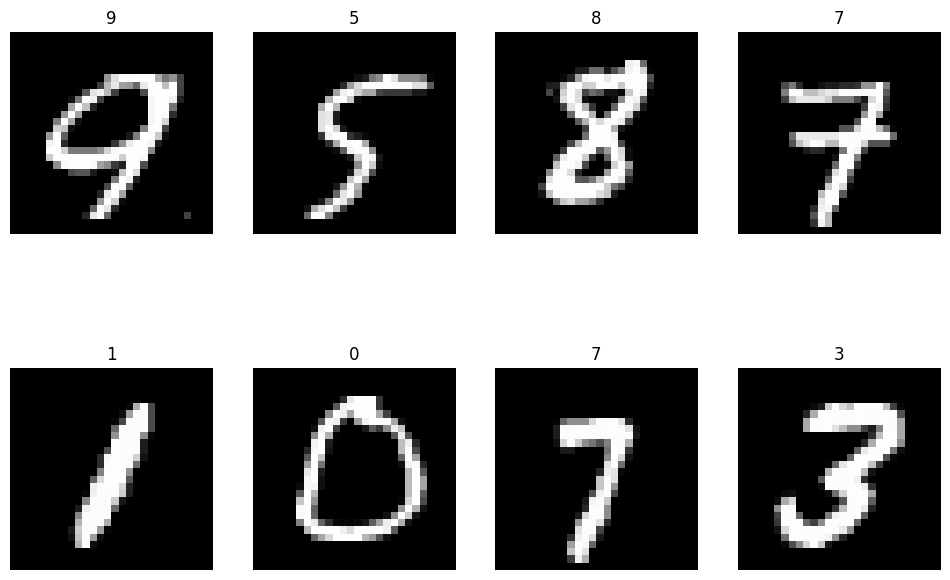

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,8))

for i in range(1, images.shape[0]+1):
  sample_idx = torch.randint(len(trainset), size=(1, )).item()   # 실제값을 인덱스로
  img, label = trainset[sample_idx]
  figure.add_subplot(2, 4, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
  plt.show


## 4-2. 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력

- 모듈(module): 한 개 이상의 계층이 모여서 구성

- 모델(model): 한 개 이상의 모듈이 모여서 구성


- torch.nn패키지
  - 주로 가중치, 편향값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용(weight 값들을 직접 선언 안함)

  - https://pytorch.org/docs/stable/nn.html

In [ ]:
import torch.nn as nn

torch.nn.Linear 계층 예제
- 단순 선형 회귀 일 때,
  - input_data가 다음의 2행 3열이라면
    - [[1 2 3],
    -  [2 4 1]]
    - 열의 개수가 입력 차원(in_features)이 되는 것이고,
    - 행의 개수는 batch_size가 되는 것.

  - torch.nn.Linear(in_features=3, out_features=1, bias=True)로 표현할 수 있음


In [ ]:
input = torch.randn(128, 20)  # 입력 텐서의 크기 => (128, 20)
print(input.shape)

model = nn.Linear(20, 30)     # input_size = 20, output_size = 30
print(model)                  # 가중치 20, 편향 30

output = model(input)         # 모델에 input값을 넣음.
print(output)
print(output.size())          # (128,20) (20, 30) 내적의 결과로 output.size => (128, 30)

# grad_fn(계산한 함수): AddmmBackward()
# 순방향 연산: 모델의 입력 데이터에 행렬-행렬 곱셈을 수행후, 편향(bias)를 더해줌
# 역방향 : addmm

torch.Size([128, 20])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.0870, -0.0915,  0.2073,  ...,  0.6256, -0.0897,  1.4220],
        [ 0.6931, -0.3516,  0.2987,  ...,  0.4229,  0.1436,  0.1684],
        [-0.1094,  0.2152, -0.3004,  ..., -0.4283, -0.0466,  0.7342],
        ...,
        [ 0.5736,  1.0053, -0.5246,  ...,  0.7078,  0.5342, -1.1891],
        [ 0.3864, -0.3989,  0.0355,  ..., -0.0569, -0.4215,  0.3628],
        [ 0.0485, -0.0991, -0.2625,  ...,  0.8381,  1.8632,  1.4361]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [ ]:
# 선형 레이어(Linear layers)
# 1d만 가능하므로, .view() 를 통해 1d로 flatten해줘야 함.

flatten = input_image.view(1, 28 * 28)
flatten.shape

lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

### 4-2-1. Convolution Layer

- input = torch.randn(20, 16, 50, 100)
  - batch_size : 20
  - channel: 16 (입력채널의 갯수)
  - height: 50 (높이)
  - width: 100 (너비)

- nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
  - 입력 채널 수: 16
  - 출력 채널 수: 33
  - 커널 크기: (3, 5)
  - 스트라이드(stride): (2, 1)
  - 패딩(padding): (4, 2)
  - 확장(dilation): (3, 1)

---
Tensorflow로 표현한다면?
- tf.keras.Sequential([
    tf.keras.layers.Conv2D(33, (3, 5), strides=(2, 1), padding='valid', input_shape=(None, None, 16))
])

- model = tf.keras.Sequential()
  - model.add(tf.keras.layers.Conv2D(33, (3, 5), strides=(2, 1), padding='valid', input_shape=(None, None, 16)))

In [ ]:
input = torch.randn(20, 16, 50, 100)

model = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))

# Tensorflow를 썼을 때는
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(33, (3,5), strides=(2,1), padding="valid",
#           input_shape=(None, None, 16)))

output = model(input)

output.shape
# batch_size = 20
# 출력 채널 33 : (Conv2D에서 설정된 출력 채널의 수)
# 출력 높이 26 : ((입력 높이 + 2 * 패딩 높이 - 확장 높이 * (커널 높이 - 1) - 1) / 스트라이드 높이) + 1 => (50 + 2*4 - 3*2 -1)/2 + 1 = (50+8-6-1)/2+1) = 25.5 + 1 = 26.5
# 출력 너비 100: ((입력 너비 + 2 * 패딩 너비 - 확장 너비 * (커널 너비 - 1) - 1) / 스트라이드 너비) + 1 => (100 + 2*2 - 1*4 - 1)/1 + 1 = (100+4-4-1)/1 + 1 = 100

torch.Size([20, 33, 26, 100])

In [ ]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer.weight.shape

# 컨볼루션 레이어의 가중치 텐서
# 출력 채널:20
# 입력 채널:1
# 커널: 5, 5

torch.Size([20, 1, 5, 5])

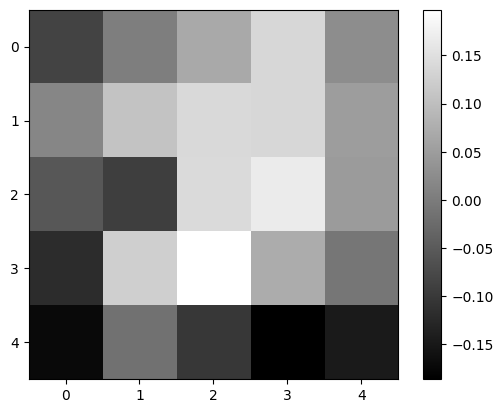

In [ ]:
weight = layer.weight.detach().numpy()

plt.imshow(weight[0, 0, :, :], 'gray')
plt.colorbar()

In [ ]:
# mnist의 사진을 이용.
print(images.shape)  # batch_size = 8 (8장이 있고), 채널=1(흑백), 높이=28, 너비:28

print(images[0].shape)

input_data = torch.unsqueeze(images[0], dim=0)  # 첫번째 사진만 꺼내오겠다.
print(input_data.size())


# layer 통과시키기
output_data = layer(input_data)  # layer -> conv2d(1, 20, 5, 1)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

# 높이 28 = (28 + 2 * 패딩 - 커널)/stride + 1 = (28+0-5)/1 + 1 = 24
# 너비 28 = (28 + 2 * 패딩 - 커널)/stride + 1 = (28+0-5)/1 + 1 = 24

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

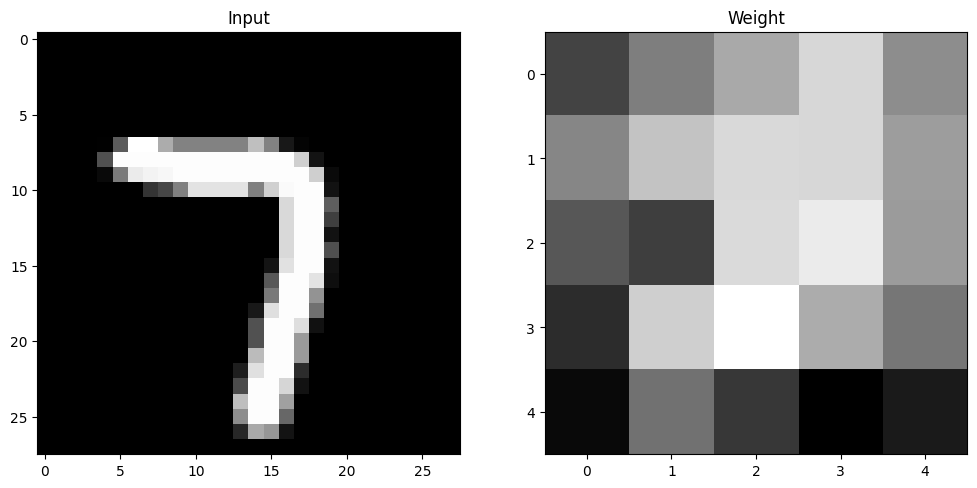

In [ ]:
input_images = torch.squeeze(images[0])

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Input")
plt.imshow(input_images, 'gray')

plt.subplot(1,2,2)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'gray')

### 4-2-2. Pooling(풀링) Layer
- F.max_pool2d
  - stride
  - kernel_size

- torch.nn.MaxPool2D 많이 사용

---
- Tensorflow
  - model = tf.keras.Sequential()
  - model.add(tf.keras.layers.Conv2D(33, (3,5), strides=(2,1), padding="valid", input_shape=(None, None, 16)))
  - model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

In [ ]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
# pool = torch.nn.MaxPool2d



pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 numpy()변환이 바로 가능

In [ ]:
pool_arr = pool.numpy()    # 24, 24 size가 12, 12로 줄었음
pool_arr.shape

(1, 20, 12, 12)

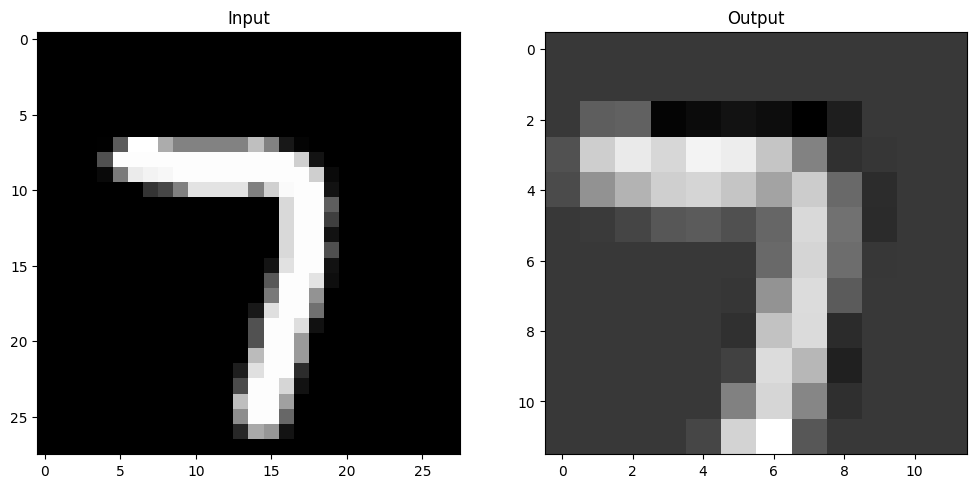

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Input")
plt.imshow(input_images, 'gray')

plt.subplot(1,2,2)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')

### 4-2-3. 활성화 함수

- F.softmax(다중분류)
- F.relu와 같은 활성화 함수

In [ ]:
input_images.shape

torch.Size([28, 28])

In [ ]:
with torch.no_grad():
  flatten = input_images.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.0942, 0.0943, 0.1039, 0.0847, 0.1157, 0.0682, 0.0933, 0.0979, 0.1484,
         0.0994]])

In [ ]:
np.sum(softmax.numpy())

0.9999999

In [ ]:
inputs = torch.randn(4, 3, 28, 28).to(device)
print(inputs.shape)

layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))

output.shape
# 입력 batch_size : 4
# 출력 채널의 갯수(conv2D를 거치며): 20
# 높이: (28(높이) - 5(커널))/1(스트라이드) + 1 = 28 - 5 + 1 = 24
# 너비: (28(너비) - 5(커널))/1(스트라이드) + 1 = 28 - 5 + 1 = 24

torch.Size([4, 3, 28, 28])


torch.Size([4, 20, 24, 24])

## 4-3. 모델 정의

- nn.Module 상속 클래스 정의
  - nn.Module을 상속받는 클래스 정의
  - \_\_init__(): 모델에서 사용될 모듈과 활성화 함수 등을 정의
  - forward() : 모델에서 실행되어야 하는 연산 정의

In [ ]:
# 단순한 선형 모델 정의해보자.
class Model(nn.Module):                  # nn.Module 클래스를 상속
  def __init__(self, inputs):            # inputs은 입력될 차원
    super(Model, self).__init__()        # nn.Module의 생성자를 호출
    self.layer = nn.Linear(inputs, 1)    # layer 정의:  inputs를 받아 1차원 텐서를 출력
    # self.layer = tf.keras.layers.Dense(1, input_shape=(inputs,))

    self.activation = nn.Sigmoid()       # 활성화 함수 정의
    # self.activation = tf.keras.layers.Activation('sigmoid')

  def forward(self, x):                  # 연산 정의
    x = self.layer(x)                    # x는 layer층을 거치고
    x = self.activation(x)               # 활성화 함수도 거친다.
    return x

model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


nn.Sequential 을 이용한 신경망 정의

- nn.Sequential 객체로 그 안에 각 모듈을 순차적으로 실행

- \_\_init__()에서 사용할 네트워크 모델들을 nn.Sequential로 정의 가능
- forward() 에서 실행되어야 할 연산을 가독성 높게 간편히 작성 가능

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=32, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.Softmax(dim=1)
    )

  def forward(self, x):
    x = self.layer(1)
    x = self.layer(2)
    x = x.view(x.shape[0], -1)
    x= self.layer(3)
    return x

model = Model()

print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): Softmax(dim=1)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): Softmax(dim=1)
  )
), Sequential(
  (0): Conv

### 4-3-1. 모델의 파라미터

- 손실 함수(Loss Function)
  - 예측값과 실제값 사이의 오차를 측정
  - 학습이 진행되면서, 학습이 얼마나 잘 진행되고 있는지를 나타내는 지표의 역할
  - 모델이 훈련하는 동안 최소화될 값
  - 손실 함수에 따른 결과를 통해 학습할 파라미터를 조정해나감
  - 미분 가능한 함수 사용
  - Pytorch의 주요 손실 함수
    - torch.nn.BCEloss(Binary crossentropy)
      - 이진 분류를 위해 사용
    - torch.nn.CrossEntropyLoss
      - 다중 클래스 분류를 위해 사용
    - torch.nn.MSELoss(Mean squared Error)
      - 회귀 모델에서 사용

- 옵티마이저(Optimizer)
  - 손실 함수를 기반으로 모델이 어떻게 업데이트 되어야 하는지를 결정(어떤 종류의 확률적 경사 하강법을 사용할지)
  - optimizer는 step()을 통해 전달받은 파라미터로 모델 업데이트
  - 모든 옵티마이저의 기본으로 torch.optim.Optimizer(params, defaults)클래스를 사용
  - zero_grad()를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
  - torch.optim.ir_schedular를 이용해 에포크에 따라 학습률(learning_rate) 조절
  - Pytorch의 주요 옵티마이저
    - optim.Adadelta
    - optim.Adagrad
    - optim.Adam
    - optim.RMSprop
    - optim.SGD

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

- 학습률 스케줄러(Learning Rate Schedular)
  - 학습시 특정 조건에 따라 학습률을 조정해나가며 최적화 시킬 수 있음.
  - 일정 횟수 동안 성능이 나아지지 않는다면 학습률을 감소시키거나 전역 최소점(global minimum)근처에 가면 학습률을 줄이는 시도를 할 수있음
  - Pytorch의 학습률 스케줄러 종류
    - optim.lr_schedular.LambdaLR
      - 람다 함수를 이용해 결과를 학습률로 설정
    - optim.lr_schedular.StepLR
      - 단계(step)마다 학습률을 감마 비율만큼 감소
    - optim.lr_schedular.MultiStepLR
      - StepLR과 비슷하지만 단계가 아니라 지정된 에포크에만 감마 비율로 감소
    - optim.lr_schedular.ExponentialLR
      - 에포크마다 이전 학습률에 감마를 곱함
    - optim.lr_schedular.CosineAnnealingLR
      - 학습률을 코사인함수의 형태처럼 변화시켜 학습률이 커지기도 작아지기도 함
    - optim.lr_schedular.ReduceLROnPlateau
      - 학습이 잘되는지 아닌지에 따라 동적으로 학습률을 조정해나감

- 지표(Metric)
  - 정확도가 개선되고 있는지 등을 확인
  - !pip install torchmetrics

In [ ]:
lossfunc1 = nn.MSELoss()
lossfunc2 = nn.CrossEntropyLoss()

In [ ]:
lossfunc1

MSELoss()

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.1 MB/s eta 0:00:00


In [ ]:
import torchmetrics

# 1번 방법
preds = torch.randn(10,5).softmax(dim=1)
target = torch.randint(5, (10,))
print(preds)
print(target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
print("정확도:", acc)

tensor([[0.0693, 0.0665, 0.6044, 0.1999, 0.0599],
        [0.1983, 0.1814, 0.1739, 0.0949, 0.3515],
        [0.1353, 0.2850, 0.0616, 0.4223, 0.0958],
        [0.2107, 0.1941, 0.0639, 0.3562, 0.1752],
        [0.3222, 0.0213, 0.5609, 0.0606, 0.0349],
        [0.1330, 0.0431, 0.6506, 0.0797, 0.0936],
        [0.0405, 0.7854, 0.1054, 0.0481, 0.0206],
        [0.0875, 0.1120, 0.0794, 0.1001, 0.6210],
        [0.1216, 0.4510, 0.0864, 0.2531, 0.0880],
        [0.3076, 0.1707, 0.2005, 0.2589, 0.0623]])
tensor([2, 0, 4, 1, 0, 2, 4, 1, 2, 1])
정확도: tensor(0.2000)


In [ ]:
# 2번 방법
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

preds = torch.randn(10,5).softmax(dim=1)
target = torch.randint(5, (10,))

acc = metric(preds, target)

print(acc)

tensor(0.1000)


## 4-4. 사전 학습 모델

- https://pytorch.org/vision/stable/models.html

# 5. 선형 회귀 모델(Linear Regression Model)실습

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## 5-1. 데이터 정의

In [ ]:
# 임의 데이터 생성

X = torch.randn(200,1) * 10      # batch_size=200, in_features = 1
print(X.shape)

y = X + 3 * torch.randn(200,1)
print(y.shape)

torch.Size([200, 1])
torch.Size([200, 1])


## 5-2. 모델 정의 및 파라미터

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1,bias=True)      # in_features=1, out_features=1

  def forward(self, x):
    pred = self.linear(x)
    return pred

model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.2399]], requires_grad=True), Parameter containing:
tensor([-0.1594], requires_grad=True)]


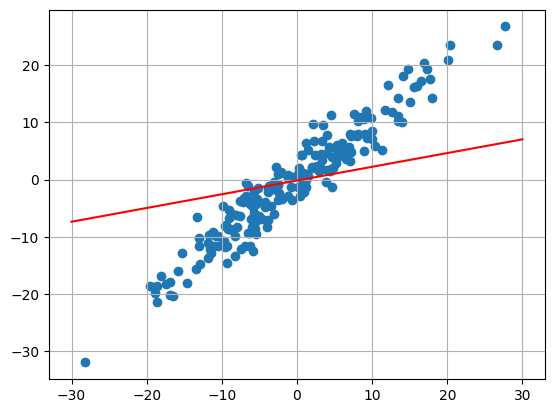

In [ ]:
# 학습 이전 x,y의 관계선을 그려보기
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()

## 5-3. 손실함수 및 옵티마이저 선언과 학습

In [ ]:
import torch.optim as optim

lossfunc = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

losses = []

for epoch in range(100):
  optimizer.zero_grad()      # 초기 gradient를 0으로 초기화

  y_pred = model(X)
  loss = lossfunc(y_pred, y)
  losses.append(loss.item())
  loss.backward()

  optimizer.step()

Text(0, 0.5, 'Loss')

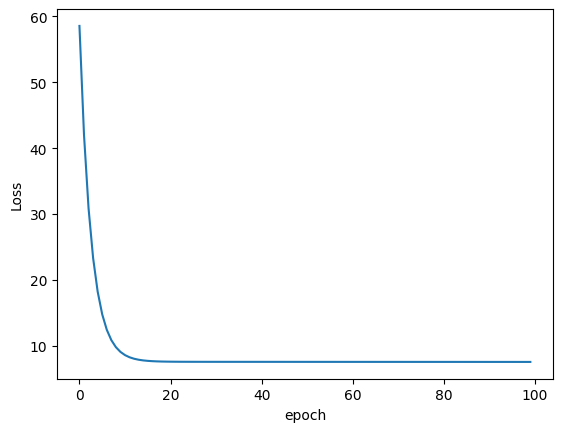

In [ ]:
plt.plot(range(100), losses)
plt.xlabel("epoch")
plt.ylabel('Loss')

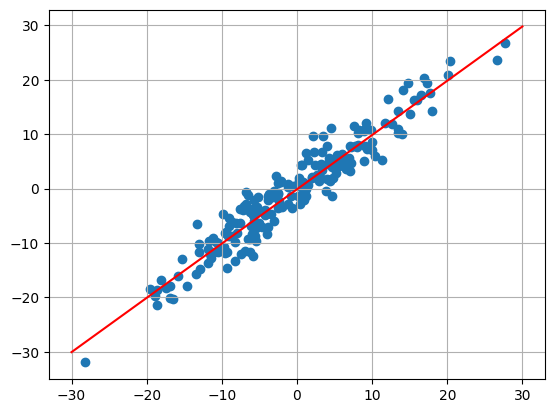

In [ ]:
# 학습 이후 x,y 관계선을 그려보기
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()

# 6. 분류 모델(Classification Model) 실습

## 6-1. 데이터 정의
- Fashion MNIST 분류 모델

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5), (0.5))])

In [ ]:
trainset = datasets.FashionMNIST(root= '/content', train=True,
                                 download=True, transform = transform)

testset = datasets.FashionMNIST(root= '/content', train=False,
                                 download=True, transform = transform)

In [ ]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True,
                          num_workers=2)

test_loader = DataLoader(testset, batch_size=128, shuffle=False,
                          num_workers=2)

In [ ]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

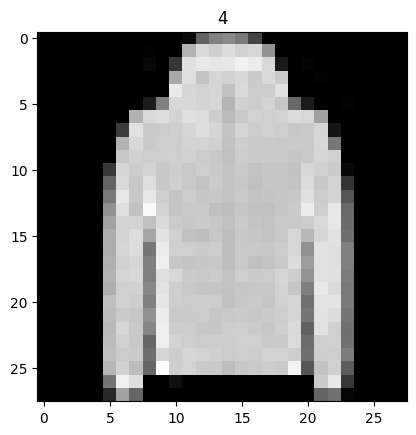

In [ ]:
label = labels[0].item()
plt.title(label)             # 레이블이 0~9로 설정되어 있기 때문에, label_map을 만들어주어야 함.
plt.imshow(images[0].squeeze(), cmap='gray')


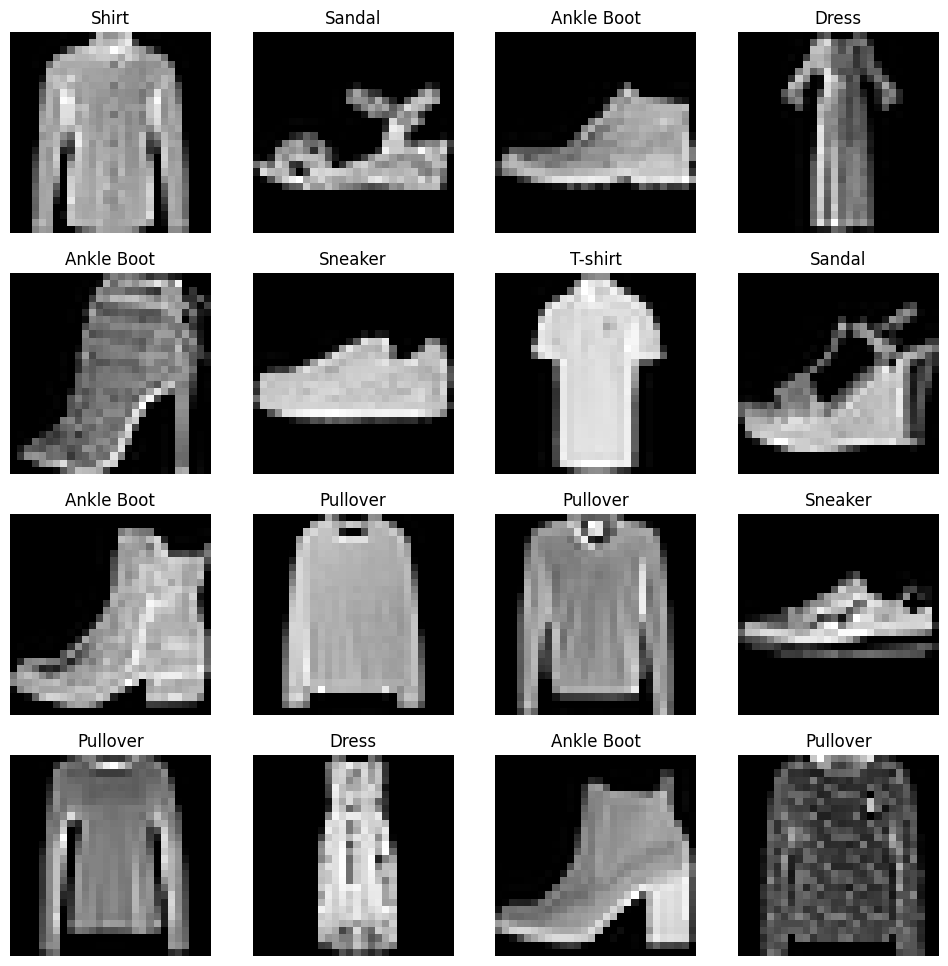

In [ ]:
labels_map = {
    0 : 'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle Boot'
}

figure = plt.figure(figsize=(12,12))
for i in range(1, 17):
  image = images[i].squeeze()
  label_idx = labels[i].item()        # 값을 받아와서
  label = labels_map[label_idx]       # 숫자를 한글 항목에 매핑 시켜준다.

  figure.add_subplot(4, 4, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')

## 6-2. 모델 정의 및 파라미터 설정

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)           # 최종 레이블은 10개

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s

    return num_features

model = NeuralNet()
print(model)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(model.parameters())

print(params[0].size())

torch.Size([6, 1, 3, 3])


## 6-3. 손실함수 및 옵티마이저 선언과 학습

In [ ]:
len(train_loader)

469

In [ ]:
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

for epoch in range(10):
  running_loss = 0.0

  for i, data in enumerate(train_loader,0):

    inputs, labels = data

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = lossfunc(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 100 == 99:
      print('Epoch : {}, iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch : 1, iter:100, Loss:0.10725131583213807
Epoch : 1, iter:200, Loss:0.09122333526611329
Epoch : 1, iter:300, Loss:0.06276001727581024
Epoch : 1, iter:400, Loss:0.045019104599952696
Epoch : 2, iter:100, Loss:0.03708364966511726
Epoch : 2, iter:200, Loss:0.036491042345762253
Epoch : 2, iter:300, Loss:0.034736865878105164
Epoch : 2, iter:400, Loss:0.03408579337596893
Epoch : 3, iter:100, Loss:0.03290929974615574
Epoch : 3, iter:200, Loss:0.032671605929732325
Epoch : 3, iter:300, Loss:0.03197591443359852
Epoch : 3, iter:400, Loss:0.03054840862751007
Epoch : 4, iter:100, Loss:0.030568186968564986
Epoch : 4, iter:200, Loss:0.030155838280916215
Epoch : 4, iter:300, Loss:0.028840967193245887
Epoch : 4, iter:400, Loss:0.029123897522687913
Epoch : 5, iter:100, Loss:0.02796696698665619
Epoch : 5, iter:200, Loss:0.02821304552257061
Epoch : 5, iter:300, Loss:0.028042546629905702
Epoch : 5, iter:400, Loss:0.0271543393433094
Epoch : 6, iter:100, Loss:0.02686048623919487
Epoch : 6, iter:200, Loss:

## 6-4. 모델 저장 및 로드

- torch.save : model.state_dict()를 저장
- torch.load : load_state_dict로 모델 로드

In [ ]:
PATH = '/content/fashion_mnist'
torch.save(model.state_dict(), PATH)   # 저장

# 로드
model = NeuralNet()
model.load_state_dict(torch.load(PATH))

model.parameters

## 6-5. 모델 평가

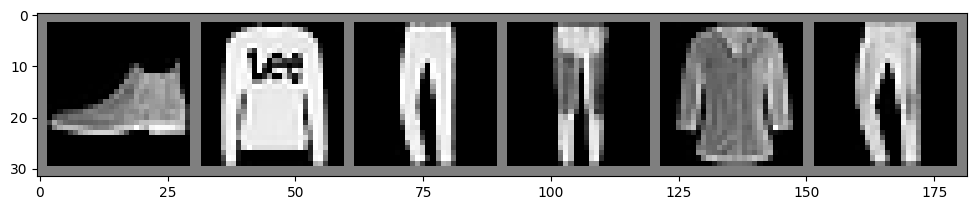

In [ ]:
def imshow(image):
  image = image / 2 + 0.5
  np_img = image.numpy()

  fig = plt.figure(figsize=(12, 8))

  plt.imshow(np.transpose(np_img, (1,2,0)))
  plt.show()

images, labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print(predicted[0:6])

a = list(predicted[:6].numpy())
a

for i in a:
  print(labels_map[i])

tensor([9, 2, 1, 1, 6, 1])
Ankle Boot
Pullover
Trouser
Trouser
Shirt
Trouser
